# Sigutils Plotting Examples

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
import sigutils

Here is a basic Bode plot using `scipy.signal` to generate the transfer function.

(<matplotlib.figure.Figure at 0x109cce750>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x109ccec90>,
  <matplotlib.axes._subplots.AxesSubplot at 0x109dc8950>))

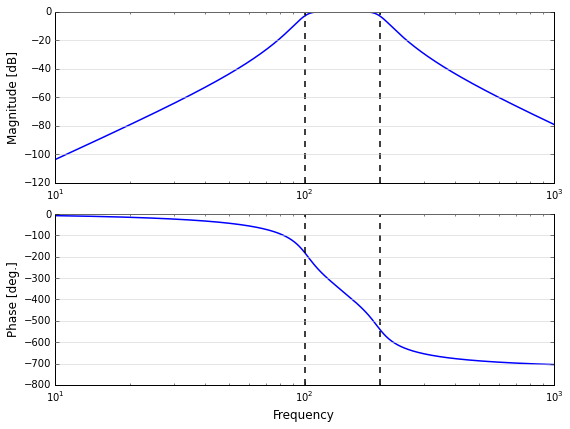

In [2]:
sigutils.bode_sys(signal.butter(4, [100*2*np.pi, 200*2*np.pi], analog=True, btype='bandpass'), xlim=(10, 1000), gain_point=-3)

Here is a plot using `bode_syss` to plot multiple transfer functions on the same graph.

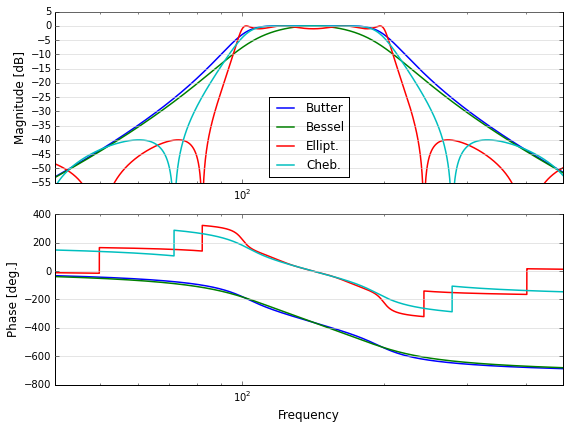

In [3]:
butter = signal.butter(4, [100*2*np.pi, 200*2*np.pi], analog=True, btype='bandpass')
bessel = signal.bessel(4, [100*2*np.pi, 200*2*np.pi], analog=True, btype='bandpass')
ellip  =  signal.ellip(4, 1, 40, [100*2*np.pi, 200*2*np.pi], analog=True, btype='bandpass')
cheb2  = signal.cheby2(4, 40, [100*2*np.pi*0.75, 200*2*np.pi/0.75], analog=True, btype='bandpass')
fig, (ax1, ax2) = sigutils.bode_syss((butter, bessel, ellip, cheb2), xlim=(40, 480), mag_lim=(-55, 5, 5),)
ax1.legend(['Butter', 'Bessel', 'Ellipt.', 'Cheb.'], loc='lower center')

Quickly compare different filter parameters using `bode_firs`.

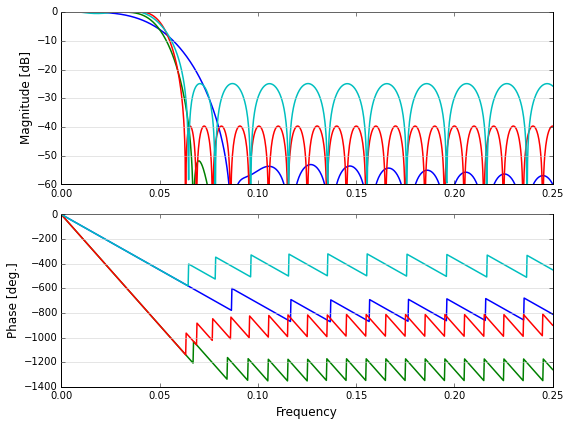

In [4]:
fig, (ax1, ax2) = sigutils.bode_firs((signal.firwin(51, 0.1, nyq=1),
                                     signal.firwin(101, 0.1, nyq=1),
                                     signal.remez(101, [0, 0.085, 0.125, 1], [1, 0], Hz=2),
                                     signal.remez(51, [0, 0.085, 0.125, 1], [1, 0], Hz=2)),
                                     xlim=(0, 0.25), mag_lim=(-60, 0, 10))

Plot analog and digital filters together on the same (analog) frequency axis, useful for evaluating digital approximations to analog filters.

(<matplotlib.figure.Figure at 0x10b2a87d0>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x10c51e890>,
  <matplotlib.axes._subplots.AxesSubplot at 0x10dd95690>))

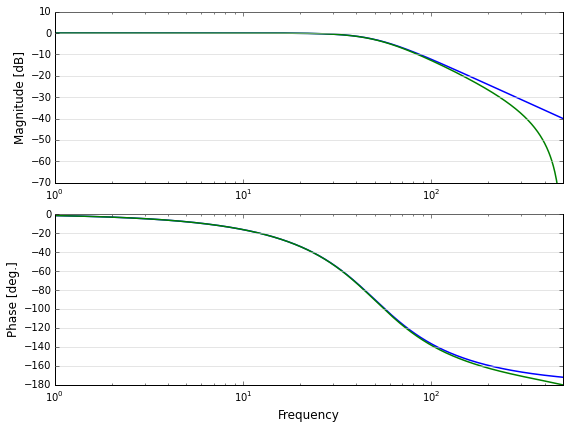

In [5]:
butt = signal.butter(2, 2*np.pi*50, analog=True, output='ba')
fs = 1000
ba = signal.cont2discrete(butt, 1/fs, method='bilinear')[:-1]
sigutils.bode_an_dig((butt,), (ba,), fs, xlog=True, xlim=(1, 500), mag_lim=(-70, 10, 10))

Plot the poles and zeros of a given digital system.

(<matplotlib.figure.Figure at 0x109cce690>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1066c4c50>)

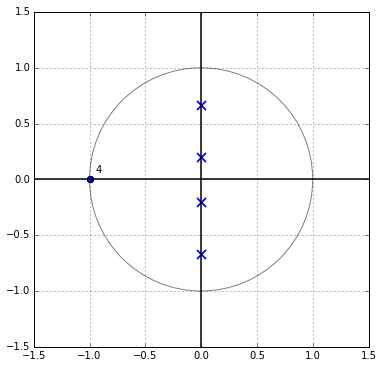

In [6]:
z, p, k = signal.butter(4, 0.5, output='zpk')
sigutils.pole_zero((z, p, k))

(<matplotlib.figure.Figure at 0x10f5c3950>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10f5afd10>)

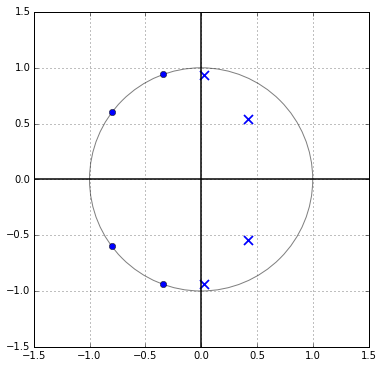

In [7]:
z, p, k = signal.ellip(4, 3, 40, 0.5, output='zpk')
sigutils.pole_zero((z, p, k))

In [8]:
freq, resp = signal.freqresp((z, p, k))

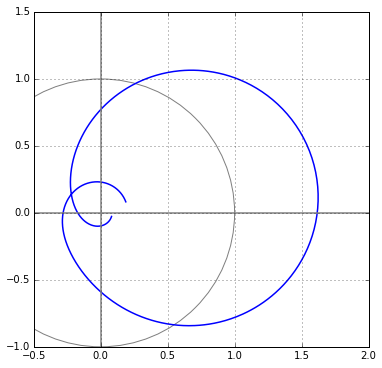

In [9]:
fig, ax = sigutils.plot.nyquist(freq, resp)

Let's evaluate some systems close to instability.